In [2]:
import math
# Function to create forward difference table
def forward_diff_table(y, n):
    diff = [y.copy()]
    for i in range(1, n):
        row = []
        for j in range(n - i):
            val = diff[i - 1][j + 1] - diff[i - 1][j]
            row.append(val)
        diff.append(row)
    return diff
    
# Function to calculate interpolation
def newton_forward(x, y, xp):
    n = len(x)
    h = x[1] - x[0]
    u = (xp - x[0]) / h

    diff = forward_diff_table(y, n)

    yp = y[0]
    u_term = 1
    for i in range(1, n):
        u_term *= (u - i + 1)
        yp += (u_term * diff[i][0]) / math.factorial(i)

    return yp

# Example Input
x = [10, 20, 30, 40]
y = [0.9848, 0.9397, 0.8660, 0.7660]  # Example: sin(x) in degrees
xp = float(input("Enter the value of x to interpolate: "))

yp = newton_forward(x, y, xp)
print(f"Interpolated value at x = {xp} is {yp:.5f}")


Enter the value of x to interpolate:  12


Interpolated value at x = 12.0 is 0.97818


In [3]:
import numpy as np
import matplotlib.pyplot as plt

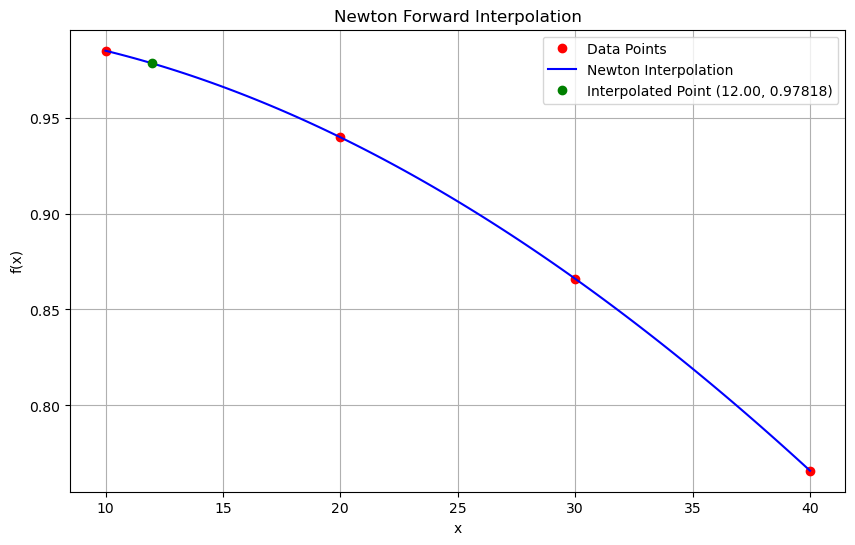

In [4]:
# Plotting
x_interp = np.linspace(min(x), max(x), 100)
y_interp = [newton_forward(x, y, xi) for xi in x_interp]

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='Data Points')
plt.plot(x_interp, y_interp, 'b-', label='Newton Interpolation')
plt.plot(xp, yp, 'go', label=f'Interpolated Point ({xp:.2f}, {yp:.5f})')

plt.title("Newton Forward Interpolation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()
